# COMP47590 Advanced Machine Learning Lab One

The	notebook is to build a classification model that can recognise the different fashion items from Zalando MNIST Fashion dataset. The dataset contains 70,000 28x28 pixel grayscale images of fashion items of 10 different kinds: (0) t-shirt/top, (1) trouser, (2) pullover, (3) dress, (4) coat, (5) sandal, (6) shirt, (7) sneaker, (8) bag, and 9) ankle boot.

## Package Imports

Import necessary libraries to perform exploratory data analysis, feature engineering and machine learning tasks.

In [1]:
import io
import random 

# General data handling
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200) 
pd.set_option('display.max_colwidth', 100)
import numpy as np

# Drawing plots
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns # nicer plotting functionlity

# Machine learning with scikit-learn
import sklearn
import sklearn.tree
import sklearn.preprocessing
import sklearn.metrics
import sklearn.model_selection
import sklearn.svm
import sklearn.ensemble
import sklearn.linear_model
import sklearn.neighbors

# System packages for saving Python ojects
import pickle

## Setup

Set up some dictionaries to store simple model performance comparions

In [2]:
model_valid_accuracy_comparisons = dict()
model_accuracy_comparisons = dict()
model_tuned_params_list = dict()

## Load Data

In this section we will load fashion-mnist_train.csv. The target labels contains: 
* (0) t-shirt/top
* (1) trouser
* (2) pullover
* (3) dress
* (4) coat
* (5) sandal
* (6) shirt
* (7) sneaker
* (8) bag
* (9) ankle boot

Load the data from a csv file to a Pandas DataFrame and examine it.

In [3]:
training_dataset_filename = "fashion-mnist_train.csv"
target_feature_name = "label"
classes = {0: "t-shirt", 1:"trouser", 2:"pullover", 3:"dress", 4:"coat", 
           5:"sandal", 6:"shirt", 7:"sneaker", 8:"bag", 9:"ankle boot"}
display_labels = ["t-shirt", "trouser", "pullover", "dress", "coat", 
                  "sandal", "shirt", "sneaker", "bag", "ankle boot"]

In [4]:
training_data = pd.read_csv(training_dataset_filename)
print(training_data.shape)
print(training_data.columns.to_list())
display(training_data.head())
display(training_data.tail())

(60000, 785)
['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel9

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,...,pixel735,pixel736,pixel737,pixel738,pixel739,pixel740,pixel741,pixel742,pixel743,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,227,211,171,191,236,228,172,0,0,0,...,253,0,112,255,217,211,227,245,195,194,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,136,153,168,252,174,136,166,130,123,131,...,0,5,194,193,204,104,116,241,217,196,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,0,119,173,239,112,0,189,125,0,0,...,3,0,0,214,232,229,249,245,248,252,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,...,pixel735,pixel736,pixel737,pixel738,pixel739,pixel740,pixel741,pixel742,pixel743,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,0,83,155,136,116,148,110,118,67,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118,144,130,120,185,122,126,79,28,0,0,...,0,0,0,177,228,155,206,63,0,232,199,165,108,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,159,6,91,0,0,85,159,0,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,0,1,0,0,87,114,77,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,54,124,18,173,0,0,2,0,0,...,231,234,232,242,240,238,238,237,228,226,228,229,231,231,218,230,255,0,0,0,0,0,0,0,0,0,0,0,116,140,147,166,176,174,173,173,174,173,177,164,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,66,149,143,143,152,93,0,0,...,80,94,111,136,124,106,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Explore Data

Examine the training dataset and explore the distribution of the target label.

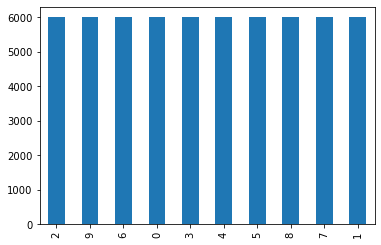

In [5]:
training_data[target_feature_name].value_counts().plot(kind = 'bar')
plt.show()

In [6]:
# Print descriptive statsitcs for each column
print("Summary Stats")
# ignore the target label
display(training_data.iloc[:,1:].select_dtypes(include=[np.number]).describe().transpose())

Summary Stats


,count,mean,std,min,25%,50%,75%,max
pixel1,60000.0,0.000900,0.094689,0.0,0.0,0.0,0.0,16.0
pixel2,60000.0,0.006150,0.271011,0.0,0.0,0.0,0.0,36.0
pixel3,60000.0,0.035333,1.222324,0.0,0.0,0.0,0.0,226.0
pixel4,60000.0,0.101933,2.452871,0.0,0.0,0.0,0.0,164.0
pixel5,60000.0,0.247967,4.306912,0.0,0.0,0.0,0.0,227.0
...,...,...,...,...,...,...,...,...
pixel780,60000.0,17.911483,45.149388,0.0,0.0,0.0,0.0,255.0
pixel781,60000.0,8.520633,29.614859,0.0,0.0,0.0,0.0,255.0
pixel782,60000.0,2.753300,17.397652,0.0,0.0,0.0,0.0,255.0
pixel783,60000.0,0.855517,9.356960,0.0,0.0,0.0,0.0,255.0


Examine presence of missing values

In [7]:
# Check for presence of missing values
print("Missing Values")
print(training_data.isnull().sum().sort_values(ascending = False))

Missing Values
label       0
pixel516    0
pixel518    0
pixel519    0
pixel520    0
           ..
pixel264    0
pixel265    0
pixel266    0
pixel267    0
pixel784    0
Length: 785, dtype: int64


Display some of the instances in the training dataset. This is very useful for images.

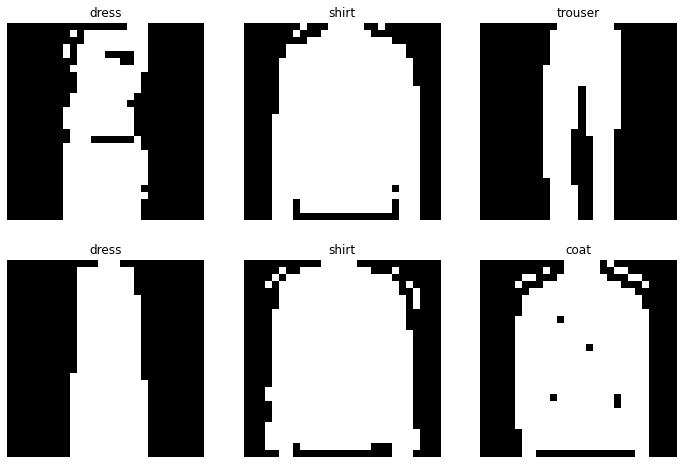

In [8]:
pltsize=4
row_images = 2
col_images = 3
plt.figure(figsize=(col_images*pltsize, row_images*pltsize))

for i in range(row_images * col_images):
    i_rand = random.randint(0, training_data.shape[0])
    plt.subplot(row_images,col_images,i+1)
    plt.axis('off')
    plt.imshow((training_data.iloc[i_rand, 1:]).values.reshape(28,28), 
               cmap='gray', 
               vmin=0, vmax=1)
    plt.title(str(classes[training_data[target_feature_name].iloc[i_rand]]))
plt.show()

## Partition Dataset

Extract the target feature that we are interested in.

In [9]:
X = training_data.iloc[:, 1:]  # exclude the target label
y = training_data[target_feature_name]

Split the MNIST fashion training dataset into a **training set** and **validation set** (using 70:30 split).

In [10]:
X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(
    X, y, 
    shuffle = True, 
    stratify = y, 
    train_size = 0.7)

## Building A Decision Tree Model

Build and train a decision tree model, and set a sensible value (0.05) for min samples per leaf.

In [11]:
baseline_tree = sklearn.tree.DecisionTreeClassifier(min_samples_split = 0.05)
baseline_tree = baseline_tree.fit(X_train, y_train)

Check the performance of the decision tree on **training data**.

In [12]:
# Make a set of predictions for the training data
y_pred = baseline_tree.predict(X_train)

In [13]:
# Print performance details
tr_accuracy = sklearn.metrics.accuracy_score(y_train, y_pred)
print("Accuracy: " +  str(tr_accuracy))
print(sklearn.metrics.classification_report(y_train, y_pred))

Accuracy: 0.7367619047619047
              precision    recall  f1-score   support

           0       0.66      0.83      0.73      4200
           1       0.88      0.93      0.91      4200
           2       0.69      0.57      0.62      4200
           3       0.76      0.70      0.73      4200
           4       0.58      0.65      0.61      4200
           5       0.75      0.83      0.79      4200
           6       0.49      0.43      0.45      4200
           7       0.82      0.82      0.82      4200
           8       0.88      0.74      0.81      4200
           9       0.88      0.87      0.87      4200

    accuracy                           0.74     42000
   macro avg       0.74      0.74      0.73     42000
weighted avg       0.74      0.74      0.73     42000



Confusion Matrix


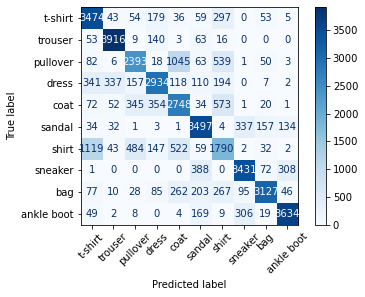

In [14]:
# Print confusion matrix
print("Confusion Matrix")
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_train, y_pred, 
                                                        cmap = 'Blues',
                                                        display_labels = display_labels,
                                                        xticks_rotation = 45)

## Evaluating on Validation Data

Use a cross validation to evaluate the performance of this tree on the MNIST fashion **validation set** created previously

In [15]:
# Make a set of predictions for the validation data
y_val_pred = baseline_tree.predict(X_valid)

In [16]:
# Print performance details
val_accuracy = sklearn.metrics.accuracy_score(y_valid, y_val_pred)
print("Accuracy: " +  str(val_accuracy))
print(sklearn.metrics.classification_report(y_valid, y_val_pred))

Accuracy: 0.7327777777777778
              precision    recall  f1-score   support

           0       0.66      0.81      0.73      1800
           1       0.88      0.92      0.90      1800
           2       0.68      0.59      0.63      1800
           3       0.76      0.70      0.73      1800
           4       0.58      0.65      0.61      1800
           5       0.75      0.83      0.78      1800
           6       0.48      0.42      0.45      1800
           7       0.81      0.80      0.80      1800
           8       0.87      0.74      0.80      1800
           9       0.88      0.86      0.87      1800

    accuracy                           0.73     18000
   macro avg       0.73      0.73      0.73     18000
weighted avg       0.73      0.73      0.73     18000



In [17]:
model_valid_accuracy_comparisons["Tree"] = val_accuracy

Confusion Matrix


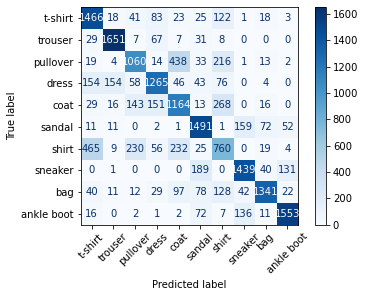

In [18]:
# Print confusion matrix
print("Confusion Matrix")
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_valid, y_val_pred, 
                                                        cmap = 'Blues',
                                                        display_labels = display_labels,
                                                        xticks_rotation = 45)

## Tune	the Hyperparmeters

Use a Grid Search to tune the tree model through a large set of possible parameters. Here we try depths between 3 and 30 and different limits on the minimum number of samples per split.

In [19]:
# Set up the parameter grid to seaerch
param_grid ={'criterion': ['gini', "entropy"],
             'max_depth': list(range(8, 22, 4)),
             'min_samples_split': [10, 15, 20, 25]}

In [20]:
# Setup the number of folds for all grid searches
cv_folds = 5

In [21]:
# Perform the search
tuned_tree = sklearn.model_selection.GridSearchCV(sklearn.tree.DecisionTreeClassifier(), 
                                                  param_grid, cv = cv_folds, verbose = 2, 
                                                  return_train_score = True, n_jobs = -1)
tuned_tree.fit(X, y)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 12, 16, 20],
                         'min_samples_split': [10, 15, 20, 25]},
             return_train_score=True, verbose=2)

In [22]:
# Print details
print("Best parameters set found on development set:")
display(tuned_tree.best_params_)
model_tuned_params_list["Tuned Tree"] = tuned_tree.best_params_

print("Best score on development set:")
display(tuned_tree.best_score_)
model_accuracy_comparisons["Tuned Tree"] = tuned_tree.best_score_

Best parameters set found on development set:


{'criterion': 'entropy', 'max_depth': 12, 'min_samples_split': 20}

Best score on development set:


0.8174333333333333

In [23]:
print("Cross Validation results:")
display(tuned_tree.cv_results_)

Cross Validation results:


{'mean_fit_time': array([11.33261042, 11.03342223, 10.48189764, 10.59927979, 16.50784631,
        16.39320121, 16.38215218, 16.36741261, 21.13196907, 21.04311161,
        21.10708022, 20.88413086, 24.55024848, 24.08668675, 23.84727378,
        23.87563806, 13.61036024, 13.53603349, 13.409127  , 13.60406885,
        21.21274691, 21.43471012, 21.51958089, 21.00177231, 25.74483242,
        25.38660631, 25.51466465, 25.24793377, 26.33374605, 26.3857162 ,
        26.27015791, 22.52176065]),
 'std_fit_time': array([0.08892769, 0.40621052, 0.01936102, 0.11742184, 0.06201365,
        0.08933152, 0.05215731, 0.06948513, 0.18853439, 0.26669099,
        0.17107806, 0.13056913, 0.29623616, 0.14878565, 0.23809287,
        0.21967236, 0.10123586, 0.07204059, 0.29288096, 0.14831835,
        0.18972331, 0.11166169, 0.19933573, 0.47440227, 0.3078897 ,
        0.0980384 , 0.3501703 , 0.25903363, 0.14643783, 0.35777934,
        0.23133819, 1.87308693]),
 'mean_score_time': array([0.03542666, 0.03281322, 

## Experiment with Different ML Models

Build different ML models and compare their performance to find the best on among them.

### Random Forests

In [24]:
# Build a random forests model
rf_model = sklearn.ensemble.RandomForestClassifier(n_estimators=300, \
                                           max_features = 3,\
                                           min_samples_split=200)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_features=3, min_samples_split=200, n_estimators=300)

In [25]:
# Make a set of predictions for the validation dataset
rf_y_val_pred = rf_model.predict(X_valid)

In [26]:
# Print performance details
accuracy = sklearn.metrics.accuracy_score(y_valid, rf_y_val_pred) 
model_valid_accuracy_comparisons["Random Forest"] = accuracy
print("Accuracy: " +  str(accuracy))
print(sklearn.metrics.classification_report(y_valid, rf_y_val_pred))

Accuracy: 0.8307777777777777
              precision    recall  f1-score   support

           0       0.77      0.82      0.79      1800
           1       0.99      0.94      0.96      1800
           2       0.70      0.77      0.73      1800
           3       0.77      0.91      0.83      1800
           4       0.68      0.74      0.71      1800
           5       0.96      0.92      0.94      1800
           6       0.73      0.40      0.52      1800
           7       0.89      0.91      0.90      1800
           8       0.92      0.96      0.94      1800
           9       0.92      0.93      0.92      1800

    accuracy                           0.83     18000
   macro avg       0.83      0.83      0.83     18000
weighted avg       0.83      0.83      0.83     18000



Random Forest Confusion Matrix


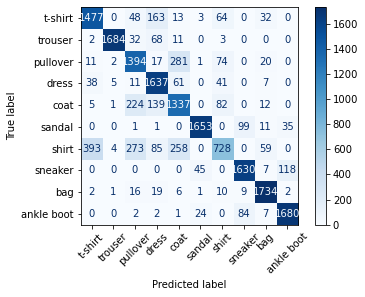

In [27]:
# Print confusion matrix
print("Random Forest Confusion Matrix")
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_valid, rf_y_val_pred, 
                                                        cmap = 'Blues',
                                                        display_labels = display_labels,
                                                        xticks_rotation = 45)

Tune hyperparameters : Use a grid search to choose parameters.

In [28]:
# Set up the parameter grid to seaerch
param_grid = [
    {'n_estimators': list(range(100, 501, 50)),
     'max_features': list(range(2, 10, 2)),
     'min_samples_split': [200]}
]

In [29]:
# Perform the search
rf_tuned_model = sklearn.model_selection.GridSearchCV(sklearn.ensemble.RandomForestClassifier(), 
                                                      param_grid, 
                                                      cv=cv_folds, 
                                                      verbose = 2, 
                                                      n_jobs = -1)
rf_tuned_model.fit(X, y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'min_samples_split': [200],
                          'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                           450, 500]}],
             verbose=2)

In [30]:
# Print details
print("Best parameters set found on development set:")
print(rf_tuned_model.best_params_)
model_tuned_params_list["Tuned Random Forest"] = rf_tuned_model.best_params_

Best parameters set found on development set:
{'max_features': 8, 'min_samples_split': 200, 'n_estimators': 300}


In [31]:
print(rf_tuned_model.best_score_)
model_accuracy_comparisons["Tuned Random Forest"] = rf_tuned_model.best_score_

0.8451166666666667


### Nearest Neighbour

In [32]:
# Build a K-Nearest Neighbour model
knn_model = sklearn.neighbors.KNeighborsClassifier()
knn_model = knn_model.fit(X_train, y_train)

In [33]:
# Make a set of predictions for the validation data
knn_y_val_pred = knn_model.predict(X_valid)

In [34]:
# Print performance details
accuracy = sklearn.metrics.accuracy_score(y_valid, knn_y_val_pred)
model_valid_accuracy_comparisons["kNN"] = accuracy
print("Accuracy: " +  str(accuracy))
print(sklearn.metrics.classification_report(y_valid, knn_y_val_pred))

Accuracy: 0.8523888888888889
              precision    recall  f1-score   support

           0       0.77      0.86      0.82      1800
           1       0.99      0.97      0.98      1800
           2       0.72      0.81      0.76      1800
           3       0.89      0.86      0.88      1800
           4       0.76      0.76      0.76      1800
           5       1.00      0.82      0.90      1800
           6       0.67      0.58      0.62      1800
           7       0.88      0.95      0.91      1800
           8       0.97      0.95      0.96      1800
           9       0.89      0.97      0.93      1800

    accuracy                           0.85     18000
   macro avg       0.86      0.85      0.85     18000
weighted avg       0.86      0.85      0.85     18000



Confusion Matrix


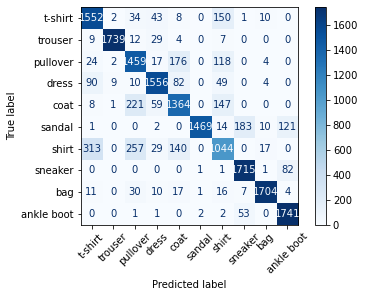

In [35]:
# Print confusion matrix
print("Confusion Matrix")
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_valid, knn_y_val_pred,
                                                        cmap = 'Blues',
                                                        display_labels = display_labels,
                                                        xticks_rotation = 45)

Tune hyperparameters : Use a grid search to choose parameters.

In [36]:
# Set up the parameter grid to seaerch
param_grid = [
    {
        'n_neighbors': list(range(1, 50, 5))
    }
]

In [37]:
# Perform the search
knn_tuned_model = sklearn.model_selection.GridSearchCV(sklearn.neighbors.KNeighborsClassifier(),
                                                       param_grid,
                                                       cv = cv_folds,
                                                       verbose = 2,
                                                       n_jobs = -1)
knn_tuned_model.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 6, 11, 16, 21, 26, 31, 36, 41,
                                          46]}],
             verbose=2)

In [38]:
# Print details
print("Best parameters set found on development set:")
print(knn_tuned_model.best_params_)
model_tuned_params_list["Tuned kNN"] = knn_tuned_model.best_params_

Best parameters set found on development set:
{'n_neighbors': 6}


In [39]:
print(knn_tuned_model.best_score_)
model_accuracy_comparisons["Tuned kNN"] = knn_tuned_model.best_score_

0.8543666666666667


### Linear Model

The Ridge regressor has a classifier variant: RidgeClassifier. This classifier first converts binary targets to {-1, 1} and then treats the problem as a regression task, optimizing the same objective as above.

In [40]:
# Build a Ridge Classifier model
rc_model = sklearn.linear_model.RidgeClassifier()
rc_model = rc_model.fit(X_train, y_train)

In [41]:
# Make a set of predictions for the validation data
rc_y_val_pred = rc_model.predict(X_valid)

In [42]:
# Print performance details
accuracy = sklearn.metrics.accuracy_score(y_valid, rc_y_val_pred)
model_valid_accuracy_comparisons["Ridge Classifier"] = accuracy
print("Accuracy: " +  str(accuracy))
print(sklearn.metrics.classification_report(y_valid, rc_y_val_pred))

Accuracy: 0.8213333333333334
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1800
           1       0.97      0.95      0.96      1800
           2       0.74      0.72      0.73      1800
           3       0.79      0.87      0.83      1800
           4       0.69      0.77      0.73      1800
           5       0.86      0.85      0.85      1800
           6       0.67      0.49      0.57      1800
           7       0.87      0.91      0.89      1800
           8       0.91      0.94      0.92      1800
           9       0.89      0.93      0.91      1800

    accuracy                           0.82     18000
   macro avg       0.82      0.82      0.82     18000
weighted avg       0.82      0.82      0.82     18000



Ridge Classifier Confusion Matrix


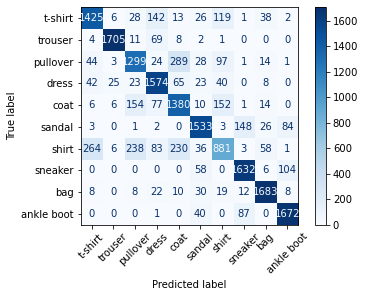

In [43]:
# Print confusion matrix
print("Ridge Classifier Confusion Matrix")
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_valid, rc_y_val_pred,
                                                        cmap = 'Blues',
                                                        display_labels = display_labels,
                                                        xticks_rotation = 45)

Tune hyperparameters : Use a grid search to choose parameters.

In [44]:
# Set up the parameter grid to seaerch
param_grid = {
    'alpha': [1, 0.1, 0.01],
    'solver': ['lsqr', 'sparse_cg', 'cholesky']
}

In [45]:
# Perform the search
rc_tuned_model = sklearn.model_selection.GridSearchCV(sklearn.linear_model.RidgeClassifier(),
                                                       param_grid,
                                                       cv = cv_folds,
                                                       verbose = 2,
                                                       n_jobs = -1)
rc_tuned_model.fit(X, y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=RidgeClassifier(), n_jobs=-1,
             param_grid={'alpha': [1, 0.1, 0.01],
                         'solver': ['lsqr', 'sparse_cg', 'cholesky']},
             verbose=2)

In [46]:
# Print details
print("Best parameters set found on development set:")
print(rc_tuned_model.best_params_)
model_tuned_params_list["Tuned Ridge Classifier"] = rc_tuned_model.best_params_

Best parameters set found on development set:
{'alpha': 1, 'solver': 'cholesky'}


In [47]:
print(rc_tuned_model.best_score_)
model_accuracy_comparisons["Tuned Ridge Classifier"] = rc_tuned_model.best_score_

0.8199500000000001


## Feature Engineering

Experiment with feature engineering so that we could perform in order to do better at this problem.

### Numerical Imputation

When we prepare data for machine learning, missing values are one of the most typical issues. In this lab, the MNIST fashion data do not have missing values in any features. The following code shows results of examination of this problem.

In [48]:
print(training_data.isnull().sum().sort_values(ascending = False))

label       0
pixel516    0
pixel518    0
pixel519    0
pixel520    0
           ..
pixel264    0
pixel265    0
pixel266    0
pixel267    0
pixel784    0
Length: 785, dtype: int64


### Normalisation

Normalise all values are scaled in a specified range between 0 and 1. This modification has no influence on the feature’s distribution, however it does exacerbate the effects of outliers due to lower standard deviations.

- **Decision Trees** and **Random Forests** models are tree-based decision algorithms, therefore they are trying to find the best split point in each feature. The split point is determined by the percentage of labels correctly classified using a feature resilient to feature scaling. Thus, normalisation does not have significant impact on Decision Trees and Random Forests models. 

- **KNN** model is based on distance-based clustering algorithms, which is highly impacted by normalisation. Clustering algorithm needs to calculate distances between entries. Normalisation makes each feature equally considered, so the large numerical value will not dominate the distances between entries.

* **Linear** model is also highly impacted by normalisation. Normalisation can avoid the issue that the numerical outliers dominate the results from the linear model.

#### Normalise Traning Data

In [49]:
# Make the min max scalar object
min_max_scaler = sklearn.preprocessing.MinMaxScaler((0,1))
min_max_scaler.fit(X_train)

MinMaxScaler()

In [50]:
# Train the scalar on the training dataset
a = min_max_scaler.transform(X_train)
X_train = pd.DataFrame(a, columns = min_max_scaler.feature_names_in_) 

In [51]:
# Normalise other partitions
a = min_max_scaler.transform(X_valid)
X_valid = pd.DataFrame(a, columns = min_max_scaler.feature_names_in_) 

In [52]:
a = min_max_scaler.transform(X)
X = pd.DataFrame(a, columns = min_max_scaler.feature_names_in_) 

Verify the results of normalisaion process.

In [53]:
display(X_train.head())
display(X_valid.head())

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,...,pixel735,pixel736,pixel737,pixel738,pixel739,pixel740,pixel741,pixel742,pixel743,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.376471,0.988235,0.800000,0.835294,0.831373,0.827451,0.823529,0.823529,0.894118,0.666667,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.627451,0.937255,0.843137,0.882353,0.874510,0.862745,0.854902,0.839216,0.898039,0.847059,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.800000,0.917647,0.819608,0.000000,0.000000,0.000000,0.000000,0.858824,0.941176,0.827451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.670588,0.909804,0.654902,0.000000,0.000000,0.000000,0.000000,0.466667,0.854902,0.772549,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.004566,0.0,0.0,0.000000,0.078431,0.756863,0.694118,0.615686,0.639216,0.752941,0.850980,0.000000,0.000000,0.0,0.007968,0.007843,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.003922,0.007843,0.0,0.000000,0.000000,0.000000,0.454902,0.658824,0.858824,0.929412,0.960784,1.000000,0.705882,0.066667,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.235294,0.835294,0.639216,0.509804,0.588235,0.537255,0.533333,0.517647,0.580392,0.698039,0.552941,0.031373,0.000000,0.000000,0.047059,0.533333,0.415686,0.294118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.047059,0.400000,0.568627,0.635294,0.623529,0.686275,0.639216,0.427451,0.192157,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.004608,0.004348,0.000000,0.0,0.0,0.000000,0.043137,0.313725,0.341176,0.145098,0.113725,0.086275,0.345098,0.525490,0.043137,0.0,0.000000,0.000000,0.0,0.009091,0.004762,0.007843,0.0,0.0,0.0,0.0,0.0,0.007843,0.011765,0.000000,0.0,0.078431,0.341176,0.580392,0.631373,0.666667,0.894118,1.000000,1.000000,0.921569,0.976471,0.815686,0.639216,0.658824,0.435294,0.180392,...,0.000000,0.0,0.823529,0.741176,0.776471,0.768627,0.776471,0.784314,0.811765,0.878431,0.694118,0.654902,0.682353,0.670588,0.745098,0.392157,0.000000,0.011765,0.003922,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.003922,0.192157,0.258824,0.235294,0.243137,0.250980,0.294118,0.294118,0.258824,0.231373,0.266667,0.247059,0.152941,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.341176,0.741176,0.545098,0.462745,0.650980,0.870588,0.247059,0.000000,0.0,0.0

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,...,pixel735,pixel736,pixel737,pixel738,pixel739,pixel740,pixel741,pixel742,pixel743,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.007843,0.0,0.137255,0.270588,0.274510,0.090196,0.000000,0.019608,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.011765,0.000000,0.156863,0.356863,0.000000,0.000000,0.360784,0.066667,0.000000,0.007843,0.000000,0.00000,0.0,0.000000,...,0.866667,0.874510,0.882353,0.901961,0.925490,0.921569,0.921569,0.929412,0.929412,0.925490,0.937255,1.000000,0.584314,0.556863,0.988235,0.898039,0.901961,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.301587,0.716,0.627451,0.611765,0.596078,0.584314,0.572549,0.549020,0.549020,0.545098,0.541176,0.533333,0.533333,0.529412,0.517647,0.647059,0.682353,0.529412,0.596078,0.568627,0.035294,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.004566,0.000000,0.00000,0.000000,0.0,0.219608,0.000000,0.043137,0.019608,0.000000,0.117647,0.0,0.000000,0.0,0.000000,0.003922,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.066667,0.486275,0.901961,0.882353,1.000000,0.768627,0.721569,1.000000,0.862745,0.827451,0.568627,0.05098,0.0,0.000000,...,0.619608,0.000000,0.192157,0.827451,0.858824,0.901961,0.921569,0.933333,0.937255,0.921569,0.886275,0.823529,0.776471,0.192157,0.000000,0.439216,0.933333,0.490196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070588,0.133333,0.129412,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015686,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.004525,0.00823,0.019608,0.0,0.086275,0.588235,0.584314,0.568627,0.392157,0.000000,0.0,0.007843,0.0,0.011952,0.000000,0.0,0.0,0.004762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007843,0.019608,0.0,0.000000,0.000000,0.000000,0.623529,0.823529,0.760784,0.756863,0.752941,0.262745,0.000000,0.000000,0.00000,0.0,0.011765,...,0.000000,0.768627,0.396078,0.560784,0.313725,0.635294,0.396078,0.254902,0.698039,0.368627,0.666667,0.580392,0.388235,0.682353,0.188235,0.000000,0.007843,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.007843,0.000000,0.160784,0.200000,0.470588,0.313725,0.545098,0.431373,0.341176,0.588235,0.380392,0.490196,0.423529,0.270588,0.325490,0.000000,0.000000,0.003922,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0

#### Nearest Neighbour

In [54]:
# Build a K-Nearest Neighbour model on normalised training data
knn_nrom_model = sklearn.neighbors.KNeighborsClassifier()
knn_nrom_model = knn_nrom_model.fit(X_train, y_train)

In [55]:
# Make a set of predictions for the validation data
knn_y_val_pred = knn_nrom_model.predict(X_valid)

In [56]:
# Print performance details
accuracy = sklearn.metrics.accuracy_score(y_valid, knn_y_val_pred)
model_valid_accuracy_comparisons["kNN norm"] = accuracy
print("Accuracy: " +  str(accuracy))
print(sklearn.metrics.classification_report(y_valid, knn_y_val_pred))

Accuracy: 0.8526111111111111
              precision    recall  f1-score   support

           0       0.77      0.86      0.82      1800
           1       0.99      0.97      0.98      1800
           2       0.72      0.81      0.76      1800
           3       0.89      0.86      0.88      1800
           4       0.76      0.76      0.76      1800
           5       1.00      0.82      0.90      1800
           6       0.67      0.58      0.62      1800
           7       0.88      0.95      0.91      1800
           8       0.97      0.95      0.96      1800
           9       0.89      0.97      0.93      1800

    accuracy                           0.85     18000
   macro avg       0.86      0.85      0.85     18000
weighted avg       0.86      0.85      0.85     18000



#### Tune hyperparameters again 

In [58]:
# Set up the parameter grid to seaerch
param_grid = [
    {
        'n_neighbors': list(range(1, 50, 5))
    }
]

In [59]:
# Perform the search
knn_norm_tuned_model = sklearn.model_selection.GridSearchCV(sklearn.neighbors.KNeighborsClassifier(),
                                                       param_grid,
                                                       cv = cv_folds,
                                                       verbose = 2,
                                                       n_jobs = -1)
knn_norm_tuned_model.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 6, 11, 16, 21, 26, 31, 36, 41,
                                          46]}],
             verbose=2)

In [60]:
# Print details
print("Best parameters set found on development set:")
print(knn_norm_tuned_model.best_params_)
model_tuned_params_list["Tuned kNN norm"] = knn_tuned_model.best_params_

Best parameters set found on development set:
{'n_neighbors': 6}


In [61]:
print(knn_tuned_model.best_score_)
model_accuracy_comparisons["Tuned kNN norm"] = knn_tuned_model.best_score_

0.8543666666666667


#### Linear Model

In [62]:
# Build a Ridge Classifier model
rc_norm_model = sklearn.linear_model.RidgeClassifier()
rc_norm_model = rc_norm_model.fit(X_train, y_train)

In [63]:
# Make a set of predictions for the validation data
rc_y_val_pred = rc_norm_model.predict(X_valid)

In [64]:
# Print performance details
accuracy = sklearn.metrics.accuracy_score(y_valid, rc_y_val_pred)
model_valid_accuracy_comparisons["Ridge Classifier norm"] = accuracy
print("Accuracy: " +  str(accuracy))
print(sklearn.metrics.classification_report(y_valid, rc_y_val_pred))

Accuracy: 0.8212777777777778
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1800
           1       0.97      0.95      0.96      1800
           2       0.74      0.72      0.73      1800
           3       0.79      0.87      0.83      1800
           4       0.69      0.77      0.73      1800
           5       0.86      0.85      0.85      1800
           6       0.67      0.49      0.56      1800
           7       0.87      0.91      0.89      1800
           8       0.91      0.94      0.92      1800
           9       0.89      0.93      0.91      1800

    accuracy                           0.82     18000
   macro avg       0.82      0.82      0.82     18000
weighted avg       0.82      0.82      0.82     18000



#### Tune hyperparameters again 

In [65]:
# Set up the parameter grid to seaerch
param_grid = {
    'alpha': [1, 0.1, 0.01],
    'solver': ['lsqr', 'sparse_cg', 'cholesky', 'saga']
}

In [66]:
# Perform the search
rc_norm_tuned_model = sklearn.model_selection.GridSearchCV(sklearn.linear_model.RidgeClassifier(),
                                                       param_grid,
                                                       cv = cv_folds,
                                                       verbose = 2,
                                                       n_jobs = -1)
rc_norm_tuned_model.fit(X, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ......................................n_neighbors=6; total time= 2.0min
[CV] END .....................................n_neighbors=11; total time= 1.9min
[CV] END .....................................n_neighbors=21; total time= 1.9min
[CV] END .....................................n_neighbors=26; total time= 1.9min
[CV] END .....................................n_neighbors=36; total time= 1.9min
[CV] END .....................................n_neighbors=46; total time= 2.0min
[CV] END ...............................alpha=1, solver=lsqr; total time=  23.7s
[CV] END ..........................alpha=1, solver=sparse_cg; total time=  33.3s
[CV] END .............................alpha=0.1, solver=lsqr; total time=  13.7s
[CV] END ........................alpha=0.1, solver=sparse_cg; total time=  28.0s
[CV] END ........................alpha=0.1, solver=sparse_cg; total time=  27.1s
[CV] END .............................alpha=0.1,

GridSearchCV(cv=5, estimator=RidgeClassifier(), n_jobs=-1,
             param_grid={'alpha': [1, 0.1, 0.01],
                         'solver': ['lsqr', 'sparse_cg', 'cholesky', 'saga']},
             verbose=2)

In [67]:
# Print details
print("Best parameters set found on development set:")
print(rc_norm_tuned_model.best_params_)
model_tuned_params_list["Tuned Ridge Classifier norm"] = rc_norm_tuned_model.best_params_

Best parameters set found on development set:
{'alpha': 1, 'solver': 'lsqr'}


In [68]:
print(rc_norm_tuned_model.best_score_)
model_accuracy_comparisons["Tuned Ridge Classifier norm"] = rc_norm_tuned_model.best_score_

0.8203333333333334


## Compare Results

In [69]:
display(model_valid_accuracy_comparisons)

{'Tree': 0.7327777777777778,
 'Random Forest': 0.8307777777777777,
 'kNN': 0.8523888888888889,
 'Ridge Classifier': 0.8213333333333334,
 'kNN norm': 0.8526111111111111,
 'Ridge Classifier norm': 0.8212777777777778}

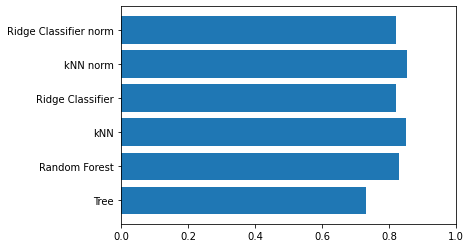

In [74]:
plt.xlim(0, 1.0)

_ = plt.barh(range(len(model_valid_accuracy_comparisons)), 
             list(model_valid_accuracy_comparisons.values()), 
             align='center')

_= plt.yticks(range(len(model_valid_accuracy_comparisons)), 
              list(model_valid_accuracy_comparisons.keys()))

In [73]:
display(model_accuracy_comparisons)

{'Tuned Tree': 0.8174333333333333,
 'Tuned Random Forest': 0.8451166666666667,
 'Tuned kNN': 0.8543666666666667,
 'Tuned Ridge Classifier': 0.8199500000000001,
 'Tuned kNN norm': 0.8543666666666667,
 'Tuned Ridge Classifier norm': 0.8203333333333334}

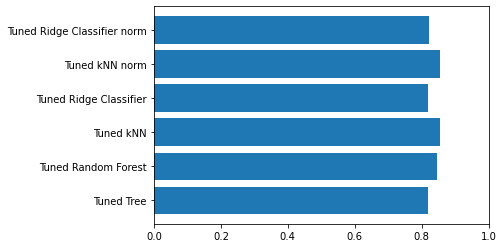

In [76]:
plt.xlim(0, 1.0)

_ = plt.barh(range(len(model_accuracy_comparisons)), 
             list(model_accuracy_comparisons.values()), 
             align='center')

_ = plt.yticks(range(len(model_accuracy_comparisons)), 
               list(model_accuracy_comparisons.keys()))

In [77]:
display(model_tuned_params_list)

{'Tuned Tree': {'criterion': 'entropy',
  'max_depth': 12,
  'min_samples_split': 20},
 'Tuned Random Forest': {'max_features': 8,
  'min_samples_split': 200,
  'n_estimators': 300},
 'Tuned kNN': {'n_neighbors': 6},
 'Tuned Ridge Classifier': {'alpha': 1, 'solver': 'cholesky'},
 'Tuned kNN norm': {'n_neighbors': 6},
 'Tuned Ridge Classifier norm': {'alpha': 1, 'solver': 'lsqr'}}

## Test Best Model On Test Dataset

In [78]:
# load Test dataset
test_dataset_filename = 'fashion-mnist_test.csv'
test_data = pd.read_csv(test_dataset_filename)
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,...,pixel735,pixel736,pixel737,pixel738,pixel739,pixel740,pixel741,pixel742,pixel743,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,44,88,99,122,123,80,0,0,0,0,...,0,212,240,213,239,233,239,231,232,236,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,235,210,241,222,171,220,199,236,27,0,...,0,0,0,0,0,220,244,206,0,87,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,2,0,0,0,0,0,140,116,85,109,...,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,184,127,185,198,213,239,126,237,255,236,...,4,209,255,254,255,255,255,255,255,255,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,235,202,166,180,207,217,228,112,0,0,...,0,0,0,0,0,0,0,0,2,70,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


In [79]:
X_test = test_data.iloc[:,1:]
y_test = test_data[target_feature_name]

In [80]:
display(X_test.shape)
display(X_test.head())

(10000, 784)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,...,pixel735,pixel736,pixel737,pixel738,pixel739,pixel740,pixel741,pixel742,pixel743,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,44,88,99,122,123,80,0,0,0,0,1,...,0,212,240,213,239,233,239,231,232,236,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,235,210,241,222,171,220,199,236,27,0,0,...,0,0,0,0,0,220,244,206,0,87,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,2,0,0,0,0,0,140,116,85,109,121,...,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,184,127,185,198,213,239,126,237,255,236,173,...,4,209,255,254,255,255,255,255,255,255,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,235,202,166,180,207,217,228,112,0,0,0,...,0,0,0,0,0,0,0,0,2,70,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


Feature engineering - Normalise the Test dataset.

In [81]:
# Make the min max scalar object
min_max_scaler = sklearn.preprocessing.MinMaxScaler((0,1))
min_max_scaler.fit(X_test)

MinMaxScaler()

In [82]:
# Train the scalar on the training dataset
a = min_max_scaler.transform(X_test)
X_test = pd.DataFrame(a, columns = min_max_scaler.feature_names_in_) 

In [83]:
best_model = sklearn.neighbors.KNeighborsClassifier(**(model_tuned_params_list["Tuned kNN norm"]))
best_model = best_model.fit(X_test, y_test)

In [84]:
# Make a set of predictions for the test data
y_test_pred = best_model.predict(X_test)

In [85]:
# Print performance details
accuracy = sklearn.metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy: " +  str(accuracy))
print(sklearn.metrics.classification_report(y_test, y_test_pred))

Accuracy: 0.8673
              precision    recall  f1-score   support

           0       0.76      0.92      0.83      1000
           1       0.99      0.96      0.97      1000
           2       0.76      0.85      0.80      1000
           3       0.92      0.87      0.90      1000
           4       0.82      0.79      0.80      1000
           5       0.99      0.82      0.90      1000
           6       0.73      0.60      0.66      1000
           7       0.87      0.96      0.91      1000
           8       0.97      0.94      0.95      1000
           9       0.90      0.96      0.93      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



Best Model (KNN) Confusion Matrix


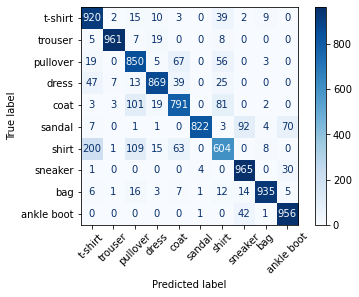

In [87]:
# Print confusion matrix
print("Best Model (KNN) Confusion Matrix")
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, 
                                                        cmap = 'Blues',
                                                        display_labels = display_labels,
                                                        xticks_rotation = 45)

## Save the Best Model

The simplest way to save a machine learning model is to use the Python pickle package.

In [88]:
fileObject = open("the_best_model.bin",'wb') 
pickle.dump(best_model, fileObject)   
fileObject.close()